In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

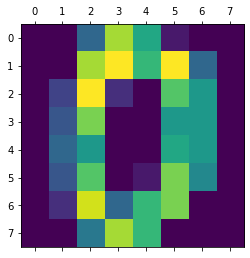

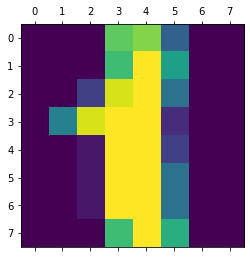

In [8]:
for i in range(2):
    plt.matshow(digits.images[i])

In [10]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)

In [11]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [12]:
from sklearn.model_selection import train_test_split

In [17]:
X = digits.data
y = digits.target

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
len(X_test)

360

In [21]:
from sklearn.linear_model import LogisticRegression

In [29]:
logistic_model = LogisticRegression(solver='lbfgs', max_iter=100)

In [30]:
logistic_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
logistic_model.score(X_test, y_test)

0.9416666666666667

In [34]:
logistic_model.predict([digits.data[67]])

array([6])

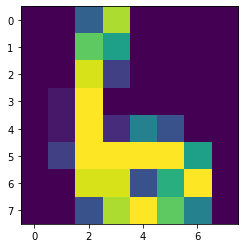

In [35]:
plt.imshow(digits.images[67])

In [36]:
import pickle
with open('logistic_model', 'wb') as f:
    pickle.dump(logistic_model, f)

In [37]:
y_predicted = logistic_model.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix

In [46]:
cm = confusion_matrix(y_test, y_predicted)

In [47]:
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  1,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 27,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  0,  1,  1],
       [ 0,  0,  1,  0,  1, 35,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0, 39,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 24,  0,  1],
       [ 0,  3,  0,  0,  0,  1,  0,  0, 32,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  2, 36]], dtype=int64)

Text(69.0, 0.5, 'Predicted value')

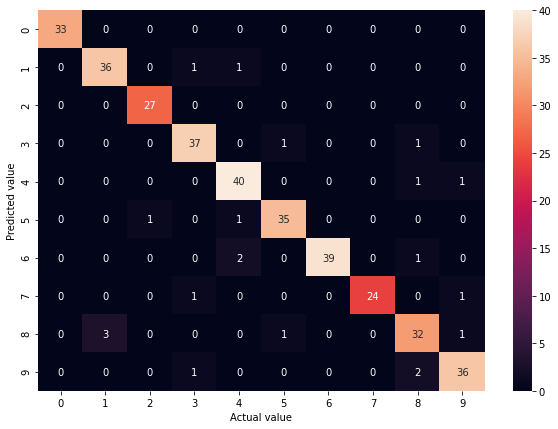

In [50]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')